In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Customer_Sales_Transactional_Data_CSV.csv',  encoding='latin1',  parse_dates=['SALES_dATE'])

In [71]:
df = data.copy()
df.head(5)

,SALES_dATE,CUSTOMER_ID,SALES_AMOUNT
0,2014-10-18,34810920,205.44
1,2014-09-22,1026037818,51.36
2,2014-09-30,1095693062,222.56
3,2014-10-25,15142688,171.20
4,2014-10-18,1022245368,171.20


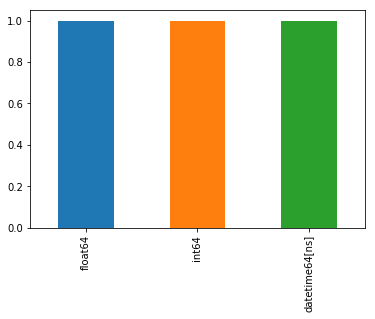

In [72]:
pp = pd.value_counts(df.dtypes)
pp.plot.bar()
plt.show()

In [73]:
df['SALES_WEEK'] = pd.DatetimeIndex(df['SALES_dATE']).week
df['SALES_WEEK'] = abs((df['SALES_WEEK'])-43)
df['SALES_WEEK'].unique()

array([1, 4, 3, 0, 2, 5])

We need to create following features for each customer on each week:

* Historic_Visits
* Historic_Sales
* STD_SALESAMOUNT
* VARIATION_SALESAMOUNT
* MAX_SALESAMOUNT
* MIN_SALESAMOUNT

Note: In this project we will be creating Churn feature from Week-0

In [74]:
agg_func = {
    'SALES_AMOUNT' : {
        'HISTORIC_VISITS': 'count',
        'HISTORIC_SALES': 'sum',
        'STD_SALESAMOUNT': 'std',
        'VAR__SALESAMOUNT': 'var',
        'MIN_SALESAMOUNT': 'min',
        'MAX_SALESAMOUNT': 'max'
    }
}

weeks = df.groupby(['CUSTOMER_ID', 'SALES_WEEK']).agg(agg_func).reset_index()
weeks.head()

/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


CUSTOMER_ID SALES_WEEK    SALES_AMOUNT                                 \
                         HISTORIC_VISITS HISTORIC_SALES STD_SALESAMOUNT   
0         488          3               1         171.20             NaN   
1        5194          2               1         599.20             NaN   
2        5398          0               1          51.36             NaN   
3        5398          2               1          51.36             NaN   
4        5398          4               1          51.36             NaN   

                                                    
  VAR__SALESAMOUNT MIN_SALESAMOUNT MAX_SALESAMOUNT  
0              NaN          171.20          171.20  
1              NaN          599.20          599.20  
2              NaN           51.36           51.36  
3              NaN           51.36           51.36  
4              NaN           51.36           51.36

In [75]:
weeks.columns = weeks.columns.droplevel(0)
weeks.columns = ['CUSTOMER_ID', 'SALES_WEEK', 'HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VAR__SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT']

In [76]:
weeks.head()

,CUSTOMER_ID,SALES_WEEK,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VAR__SALESAMOUNT,MIN_SALESAMOUNT,MAX_SALESAMOUNT
0,488,3,1,171.20,NaN,NaN,171.20,171.20
1,5194,2,1,599.20,NaN,NaN,599.20,599.20
2,5398,0,1,51.36,NaN,NaN,51.36,51.36
3,5398,2,1,51.36,NaN,NaN,51.36,51.36
4,5398,4,1,51.36,NaN,NaN,51.36,51.36


In [77]:
weeks = weeks.pivot(index='CUSTOMER_ID', columns='SALES_WEEK')
weeks.head()

HISTORIC_VISITS                          HISTORIC_SALES          \
SALES_WEEK                0    1    2    3    4    5              0       1   
CUSTOMER_ID                                                                   
488                     NaN  NaN  NaN  1.0  NaN  NaN            NaN     NaN   
5194                    NaN  NaN  1.0  NaN  NaN  NaN            NaN     NaN   
5398                    1.0  NaN  1.0  NaN  1.0  NaN          51.36     NaN   
6930                    3.0  1.0  2.0  1.0  2.0  NaN         256.80   85.60   
7260                    2.0  4.0  3.0  4.0  2.0  1.0         256.80  582.08   

                            ...   MIN_SALESAMOUNT                       \
SALES_WEEK        2      3  ...                 2      3      4      5   
CUSTOMER_ID                 ...                                          
488             NaN  171.2  ...               NaN  171.2    NaN    NaN   
5194         599.20    NaN  ...            599.20    NaN    NaN    NaN   
5398          51.36    NaN  ...             51.36    NaN  51.36    NaN   
6930         256.80   85.6  ...             85.60   85.6  85.60    NaN   
7260         445.12  513.6  ...            136.96   85.6  85.60  171.2   

            MAX_SALESAMOUNT                                       
SALES_WEEK                0      1       2      3       4      5  
CUSTOMER_ID                                                       
488                     NaN    NaN     NaN  171.2     NaN    NaN  
5194                    NaN    NaN  599.20    NaN     NaN    NaN  
5398                  51.36    NaN   51.36    NaN   51.36    NaN  
6930                  85.60   85.6  171.20   85.6   85.60    NaN  
7260                 171.20  171.2  171.20  256.8  171.20  171.2  

[5 rows x 36 columns]

In [78]:
weeks.columns

MultiIndex(levels=[['HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT', 'VAR__SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT'], [0, 1, 2, 3, 4, 5]],
           labels=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]],
           names=[None, 'SALES_WEEK'])

In [79]:
weeks.columns.droplevel()

Int64Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
            4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5],
           dtype='int64', name='SALES_WEEK')

In [80]:
weeks.columns = weeks.columns.droplevel()

In [81]:
weeks.columns

Int64Index([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3,
            4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5],
           dtype='int64', name='SALES_WEEK')

In [110]:
weeks.columns = [
'W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS','W2_HISTORIC_VISITS','W3_HISTORIC_VISITS','W4_HISTORIC_VISITS','W5_HISTORIC_VISITS',
'W0_HISTORIC_SALES','W1_HISTORIC_SALES','W2_HISTORIC_SALES','W3_HISTORIC_SALES','W4_HISTORIC_SALES','W5_HISTORIC_SALES', 
'W0_STD_SALESAMOUNT','W1_STD_SALESAMOUNT','W2_STD_SALESAMOUNT','W3_STD_SALESAMOUNT','W4_STD_SALESAMOUNT','W5_STD_SALESAMOUNT',
'W0_VAR_SALESAMOUNT','W1_VAR_SALESAMOUNT','W2_VAR_SALESAMOUNT','W3_VAR_SALESAMOUNT','W4_VAR_SALESAMOUNT','W5_VAR_SALESAMOUNT',
'W0_MIN_SALESAMOUNT','W1_MIN_SALESAMOUNT','W2_MIN_SALESAMOUNT','W3_MIN_SALESAMOUNT','W4_MIN_SALESAMOUNT','W5_MIN_SALESAMOUNT',
 'W0_MAX_SALESAMOUNT','W1_MAX_SALESAMOUNT','W2_MAX_SALESAMOUNT','W3_MAX_SALESAMOUNT','W4_MAX_SALESAMOUNT','W5_MAX_SALESAMOUNT',   
]
weeks.reset_index(inplace=True)
weeks.head()

,CUSTOMER_ID,W0_HISTORIC_VISITS,W1_HISTORIC_VISITS,W2_HISTORIC_VISITS,W3_HISTORIC_VISITS,W4_HISTORIC_VISITS,W5_HISTORIC_VISITS,W0_HISTORIC_SALES,W1_HISTORIC_SALES,W2_HISTORIC_SALES,...,W2_MIN_SALESAMOUNT,W3_MIN_SALESAMOUNT,W4_MIN_SALESAMOUNT,W5_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT,W1_MAX_SALESAMOUNT,W2_MAX_SALESAMOUNT,W3_MAX_SALESAMOUNT,W4_MAX_SALESAMOUNT,W5_MAX_SALESAMOUNT
0,488,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,171.2,NaN,NaN,NaN,NaN,NaN,171.2,NaN,NaN
1,5194,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,599.20,...,599.20,NaN,NaN,NaN,NaN,NaN,599.20,NaN,NaN,NaN
2,5398,1.0,NaN,1.0,NaN,1.0,NaN,51.36,NaN,51.36,...,51.36,NaN,51.36,NaN,51.36,NaN,51.36,NaN,51.36,NaN
3,6930,3.0,1.0,2.0,1.0,2.0,NaN,256.80,85.60,256.80,...,85.60,85.6,85.60,NaN,85.60,85.6,171.20,85.6,85.60,NaN
4,7260,2.0,4.0,3.0,4.0,2.0,1.0,256.80,582.08,445.12,...,136.96,85.6,85.60,171.2,171.20,171.2,171.20,256.8,171.20,171.2


IN additoin to each week feature, 

In [111]:
agg_func2 = {
    'SALES_AMOUNT' : {
        'HISTORIC_VISITS': 'count',
        'HISTORIC_SALES': 'sum',
        'STD_SALESAMOUNT': 'std',
        'VAR__SALESAMOUNT': 'var',
        'MIN_SALESAMOUNT': 'min',
        'MAX_SALESAMOUNT': 'max'
    },
    'SALES_dATE' : {
        'LAST_VISIT' : 'max',
        'FIRST_VISIT' : 'min'
    }
}


overall_detail = df[df['SALES_WEEK'] > 0].groupby('CUSTOMER_ID').agg(agg_func2).reset_index()
overall_detail.head()

/home/muhammadtaqi/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


CUSTOMER_ID    SALES_AMOUNT                                                  \
              HISTORIC_VISITS HISTORIC_SALES STD_SALESAMOUNT VAR__SALESAMOUNT   
0         488               1         171.20             NaN              NaN   
1        5194               1         599.20             NaN              NaN   
2        5398               2         102.72        0.000000         0.000000   
3        6930               6         599.20       34.946054      1221.226667   
4        7260              14        1968.80       52.950181      2803.721705   

                                  SALES_dATE              
  MIN_SALESAMOUNT MAX_SALESAMOUNT LAST_VISIT FIRST_VISIT  
0          171.20          171.20 2014-10-03  2014-10-03  
1          599.20          599.20 2014-10-09  2014-10-09  
2           51.36           51.36 2014-10-07  2014-09-23  
3           85.60          171.20 2014-10-15  2014-09-25  
4           68.48          256.80 2014-10-19  2014-09-19

In [112]:
overall_detail.columns.droplevel()

Index(['', 'HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VAR__SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT', 'LAST_VISIT',
       'FIRST_VISIT'],
      dtype='object')

In [113]:
overall_detail.columns = overall_detail.columns.droplevel()
overall_detail.head()

,,HISTORIC_VISITS,HISTORIC_SALES,STD_SALESAMOUNT,VAR__SALESAMOUNT,MIN_SALESAMOUNT,MAX_SALESAMOUNT,LAST_VISIT,FIRST_VISIT
0,488,1,171.20,NaN,NaN,171.20,171.20,2014-10-03,2014-10-03
1,5194,1,599.20,NaN,NaN,599.20,599.20,2014-10-09,2014-10-09
2,5398,2,102.72,0.000000,0.000000,51.36,51.36,2014-10-07,2014-09-23
3,6930,6,599.20,34.946054,1221.226667,85.60,171.20,2014-10-15,2014-09-25
4,7260,14,1968.80,52.950181,2803.721705,68.48,256.80,2014-10-19,2014-09-19


**Merge overall and weeks dfs**

In [114]:
final = overall_detail.merge(weeks, left_on='CUSTOMER_ID', right_on='CUSTOMER_ID', how='outer')

KeyError: 'CUSTOMER_ID'

In [115]:
final.shape

(200000, 45)

In [116]:
final.isnull().sum()

HISTORIC_VISITS         8158
HISTORIC_SALES          8158
STD_SALESAMOUNT        53666
VAR__SALESAMOUNT       53666
MIN_SALESAMOUNT         8158
MAX_SALESAMOUNT         8158
LAST_VISIT                 0
FIRST_VISIT                0
W0_HISTORIC_VISITS     89431
W1_HISTORIC_VISITS     88812
W2_HISTORIC_VISITS     87265
W3_HISTORIC_VISITS     79858
W4_HISTORIC_VISITS     89495
W5_HISTORIC_VISITS    108301
W0_HISTORIC_SALES      89431
W1_HISTORIC_SALES      88812
W2_HISTORIC_SALES      87265
W3_HISTORIC_SALES      79858
W4_HISTORIC_SALES      89495
W5_HISTORIC_SALES     108301
W0_STD_SALESAMOUNT    156644
W1_STD_SALESAMOUNT    155990
W2_STD_SALESAMOUNT    155380
W3_STD_SALESAMOUNT    148376
W4_STD_SALESAMOUNT    156839
W5_STD_SALESAMOUNT    173180
W0_VAR_SALESAMOUNT    156644
W1_VAR_SALESAMOUNT    155990
W2_VAR_SALESAMOUNT    155380
W3_VAR_SALESAMOUNT    148376
W4_VAR_SALESAMOUNT    156839
W5_VAR_SALESAMOUNT    173180
W0_MIN_SALESAMOUNT     89431
W1_MIN_SALESAMOUNT     88812
W2_MIN_SALESAM

In [117]:
from datetime import datetime
d0 = datetime(2014,10,19)

In [118]:
final.loc[final['FIRST_VISIT'].isnull(), 'FIRST_VISIT'] = d0
final.loc[final['LAST_VISIT'].isnull(), 'LAST_VISIT'] = d0

In [119]:
final.isnull().sum()

HISTORIC_VISITS         8158
HISTORIC_SALES          8158
STD_SALESAMOUNT        53666
VAR__SALESAMOUNT       53666
MIN_SALESAMOUNT         8158
MAX_SALESAMOUNT         8158
LAST_VISIT                 0
FIRST_VISIT                0
W0_HISTORIC_VISITS     89431
W1_HISTORIC_VISITS     88812
W2_HISTORIC_VISITS     87265
W3_HISTORIC_VISITS     79858
W4_HISTORIC_VISITS     89495
W5_HISTORIC_VISITS    108301
W0_HISTORIC_SALES      89431
W1_HISTORIC_SALES      88812
W2_HISTORIC_SALES      87265
W3_HISTORIC_SALES      79858
W4_HISTORIC_SALES      89495
W5_HISTORIC_SALES     108301
W0_STD_SALESAMOUNT    156644
W1_STD_SALESAMOUNT    155990
W2_STD_SALESAMOUNT    155380
W3_STD_SALESAMOUNT    148376
W4_STD_SALESAMOUNT    156839
W5_STD_SALESAMOUNT    173180
W0_VAR_SALESAMOUNT    156644
W1_VAR_SALESAMOUNT    155990
W2_VAR_SALESAMOUNT    155380
W3_VAR_SALESAMOUNT    148376
W4_VAR_SALESAMOUNT    156839
W5_VAR_SALESAMOUNT    173180
W0_MIN_SALESAMOUNT     89431
W1_MIN_SALESAMOUNT     88812
W2_MIN_SALESAM

In remaining columns, we are observing missing values because customer did not 

**CREATE CHURN column from WEEK 0**

In [120]:
final[['W0_HISTORIC_VISITS','W0_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W0_VAR_SALESAMOUNT', 'W0_MIN_SALESAMOUNT','W0_MAX_SALESAMOUNT']].head()

,W0_HISTORIC_VISITS,W0_HISTORIC_SALES,W0_STD_SALESAMOUNT,W0_VAR_SALESAMOUNT,W0_MIN_SALESAMOUNT,W0_MAX_SALESAMOUNT
CUSTOMER_ID,,,,,,
488,NaN,NaN,NaN,NaN,NaN,NaN
5194,NaN,NaN,NaN,NaN,NaN,NaN
5398,1.0,51.36,NaN,NaN,51.36,51.36
6930,3.0,256.80,0.00000,0.00,85.60,85.60
7260,2.0,256.80,60.52834,3663.68,85.60,171.20


In [121]:
def identifyChurn(sale):
    if sale > 0:
        return 0
    else:
        return 1

In [122]:
final['CHURN'] = 0

In [123]:
final.loc[:,('CHURN')] = final['W0_HISTORIC_SALES'].apply(identifyChurn)

In [124]:
final.columns

Index(['HISTORIC_VISITS', 'HISTORIC_SALES', 'STD_SALESAMOUNT',
       'VAR__SALESAMOUNT', 'MIN_SALESAMOUNT', 'MAX_SALESAMOUNT', 'LAST_VISIT',
       'FIRST_VISIT', 'W0_HISTORIC_VISITS', 'W1_HISTORIC_VISITS',
       'W2_HISTORIC_VISITS', 'W3_HISTORIC_VISITS', 'W4_HISTORIC_VISITS',
       'W5_HISTORIC_VISITS', 'W0_HISTORIC_SALES', 'W1_HISTORIC_SALES',
       'W2_HISTORIC_SALES', 'W3_HISTORIC_SALES', 'W4_HISTORIC_SALES',
       'W5_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W1_STD_SALESAMOUNT',
       'W2_STD_SALESAMOUNT', 'W3_STD_SALESAMOUNT', 'W4_STD_SALESAMOUNT',
       'W5_STD_SALESAMOUNT', 'W0_VAR_SALESAMOUNT', 'W1_VAR_SALESAMOUNT',
       'W2_VAR_SALESAMOUNT', 'W3_VAR_SALESAMOUNT', 'W4_VAR_SALESAMOUNT',
       'W5_VAR_SALESAMOUNT', 'W0_MIN_SALESAMOUNT', 'W1_MIN_SALESAMOUNT',
       'W2_MIN_SALESAMOUNT', 'W3_MIN_SALESAMOUNT', 'W4_MIN_SALESAMOUNT',
       'W5_MIN_SALESAMOUNT', 'W0_MAX_SALESAMOUNT', 'W1_MAX_SALESAMOUNT',
       'W2_MAX_SALESAMOUNT', 'W3_MAX_SALESAMOUNT', 'W4_MAX_SALESAMOU

In [ ]:
final.drop(['W0_HISTORIC_VISITS','W0_HISTORIC_SALES', 'W0_STD_SALESAMOUNT', 'W0_VAR_SALESAMOUNT', 'W0_MIN_SALESAMOUNT','W0_MAX_SALESAMOUNT'], axis=1, inplace=True)

In [ ]:
final.shape()

**Convert 1st Visit and Last Visit into number of days**

In [ ]:
final['FIRST_VISIT_DAY'] = 4444
final.loc[:, ('FIRST_DAY_VISIT')] = d0 - final['FIRST_VISIT']

final['LAST_VISIT_DAY'] = 4444
final.loc[:, ('LAST_DAY_VISIT')] = d0 - final['LAST_VISIT']

In [ ]:
final['FIRST_DAY_VISIT'] = final['FIRST_DAY_VISIT'].dt.days
final['LAST_DAY_VISIT'] = final['LAST_DAY_VISIT'].dt.days

In [ ]:
final.head()

In [ ]:
final.drop(['LAST_VISIT', 'FIRST_VISIT'], axis=1, inplace=True)

In [ ]:
final.var()